# Exploración Completa de Datos de Arequipa

Este notebook se enfoca en maximizar el aprovechamiento de todos los datos disponibles de Arequipa en el CSV, mejorando el filtrado y la limpieza para obtener el mayor número de registros válidos posibles.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

print("Librerías cargadas correctamente")

Librerías cargadas correctamente


In [2]:
# Cargar datos con diferentes configuraciones para capturar todos los registros
archivo_csv = './dataAire.csv'

print("Cargando datos con configuración robusta...")

# Intentar cargar con diferentes configuraciones y manejo de errores
df = None
try:
    # El CSV parece usar punto y coma como separador
    df = pd.read_csv(archivo_csv, encoding='utf-8', low_memory=False, 
                     on_bad_lines='skip', sep=';')
    print(f"Carga exitosa con UTF-8 (sep=';'). Forma: {df.shape}")
except Exception as e1:
    print(f"Error con UTF-8 y sep=';': {e1}")
    try:
        # Probar con latin-1
        df = pd.read_csv(archivo_csv, encoding='latin-1', low_memory=False, 
                         on_bad_lines='skip', sep=';')
        print(f"Carga exitosa con Latin-1 (sep=';'). Forma: {df.shape}")
    except Exception as e2:
        print(f"Error con Latin-1: {e2}")
        try:
            # Probar con cp1252
            df = pd.read_csv(archivo_csv, encoding='cp1252', low_memory=False, 
                             on_bad_lines='skip', sep=';')
            print(f"Carga exitosa con CP1252 (sep=';'). Forma: {df.shape}")
        except Exception as e3:
            print(f"Error final: {e3}")

if df is not None:
    print(f"\nDataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    print(f"\nNombres de columnas:")
    for i, col in enumerate(df.columns):
        print(f"{i+1:2d}. {col}")
    
    print(f"\nPrimeras 3 filas:")
    print(df.head(3))
    
    # Limpiar comillas de los nombres de columnas si existen
    df.columns = df.columns.str.replace('"', '')
    print(f"\nColumnas después de limpiar comillas:")
    for i, col in enumerate(df.columns):
        print(f"{i+1:2d}. {col}")
        
else:
    print("No se pudo cargar el archivo CSV")

Cargando datos con configuración robusta...
Carga exitosa con UTF-8 (sep=';'). Forma: (2883877, 36)

Dataset cargado: 2883877 filas, 36 columnas

Nombres de columnas:
 1. NOMBRE_EVALUACION
 2. COMPONENTE_AMBIENTAL
 3. PROCEDENCIA_MUESTRA
 4. NOMBRE_PUNTO
 5. ESTE
 6. NORTE
 7. ALTITUD
 8. ZONA
 9. DATUM
10. DEPARTAMENTO
11. PROVINCIA
12. DISTRITO
13. UBIGEO
14. DESCRIPCION_UBICACION
15. TIPO_MUESTRA
16. TIPO_ANALISIS
17. PERIODO
18. FECHA_INICIO
19. HORA_INICIO
20. FECHA_FIN
21. HORA_FIN
22. UNIDAD_MEDIDA
23. DIOXIDO_AZUFRE
24. DIRECCION_VIENTO
25. HUMEDAD_RELATIVA
26. PM10
27. PM2.5
28. MONOXIDO_CARBONO
29. OZONO
30. PRECIPITACION
31. PRESION_BAROMETRICA
32. RADIACION_SOLAR
33. SULFURO_HIDROGENO
34. TEMPERATURA
35. VELOCIDAD_VIENTO
36. FECHA_CORTE

Primeras 3 filas:
                                   NOMBRE_EVALUACION COMPONENTE_AMBIENTAL  \
0  Calidad del aire en el ámbito de influencia de...                 Aire   
1  Calidad del aire en el ámbito de influencia de...                

In [3]:
# Explorar todas las columnas disponibles
print("INFORMACIÓN COMPLETA DEL DATASET:")
print("=" * 50)
print(f"Columnas ({len(df.columns)}):")
for i, col in enumerate(df.columns):
    print(f"{i+1:2d}. {col}")

print("\n" + "=" * 50)
print("INFORMACIÓN DE TIPOS DE DATOS:")
print(df.dtypes)

INFORMACIÓN COMPLETA DEL DATASET:
Columnas (36):
 1. NOMBRE_EVALUACION
 2. COMPONENTE_AMBIENTAL
 3. PROCEDENCIA_MUESTRA
 4. NOMBRE_PUNTO
 5. ESTE
 6. NORTE
 7. ALTITUD
 8. ZONA
 9. DATUM
10. DEPARTAMENTO
11. PROVINCIA
12. DISTRITO
13. UBIGEO
14. DESCRIPCION_UBICACION
15. TIPO_MUESTRA
16. TIPO_ANALISIS
17. PERIODO
18. FECHA_INICIO
19. HORA_INICIO
20. FECHA_FIN
21. HORA_FIN
22. UNIDAD_MEDIDA
23. DIOXIDO_AZUFRE
24. DIRECCION_VIENTO
25. HUMEDAD_RELATIVA
26. PM10
27. PM2.5
28. MONOXIDO_CARBONO
29. OZONO
30. PRECIPITACION
31. PRESION_BAROMETRICA
32. RADIACION_SOLAR
33. SULFURO_HIDROGENO
34. TEMPERATURA
35. VELOCIDAD_VIENTO
36. FECHA_CORTE

INFORMACIÓN DE TIPOS DE DATOS:
NOMBRE_EVALUACION         object
COMPONENTE_AMBIENTAL      object
PROCEDENCIA_MUESTRA       object
NOMBRE_PUNTO              object
ESTE                       int64
NORTE                      int64
ALTITUD                    int64
ZONA                       int64
DATUM                     object
DEPARTAMENTO              obje

In [4]:
# Explorar todas las ubicaciones/regiones disponibles
print("ANÁLISIS DE UBICACIONES GEOGRÁFICAS:")
print("=" * 50)

# Buscar columnas que podrían contener información geográfica
geo_columns = [col for col in df.columns if any(keyword in col.lower() for keyword in 
              ['región', 'region', 'provincia', 'distrito', 'departamento', 'ubigeo', 'lugar', 'estación', 'estacion'])]

print(f"Columnas geográficas identificadas: {geo_columns}")

# Explorar valores únicos en cada columna geográfica
for col in geo_columns:
    if col in df.columns:
        print(f"\n--- {col} ---")
        valores_unicos = df[col].value_counts().head(20)
        print(valores_unicos)
        
        # Buscar específicamente referencias a Arequipa
        arequipa_refs = df[col].astype(str).str.contains('arequipa', case=False, na=False)
        if arequipa_refs.any():
            print(f"\n*** REFERENCIAS A AREQUIPA EN {col}: {arequipa_refs.sum()} registros ***")
            print(df[arequipa_refs][col].value_counts())

ANÁLISIS DE UBICACIONES GEOGRÁFICAS:
Columnas geográficas identificadas: ['DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO']

--- DEPARTAMENTO ---
DEPARTAMENTO
PIURA          769234
ANCASH         449938
PASCO          395747
MOQUEGUA       339887
JUNIN          318498
CUSCO          214477
LIMA           212462
LA LIBERTAD    170516
AREQUIPA         5724
CALLAO           2098
Name: count, dtype: int64
DEPARTAMENTO
PIURA          769234
ANCASH         449938
PASCO          395747
MOQUEGUA       339887
JUNIN          318498
CUSCO          214477
LIMA           212462
LA LIBERTAD    170516
AREQUIPA         5724
CALLAO           2098
Name: count, dtype: int64

*** REFERENCIAS A AREQUIPA EN DEPARTAMENTO: 5724 registros ***
DEPARTAMENTO
AREQUIPA    5724
Name: count, dtype: int64

--- PROVINCIA ---
PROVINCIA
TALARA            601312
PASCO             395747
MARISCAL NIETO    339887
YAULI             318498
SANTA             312608
LIMA              212462
CHUMBIVILCAS      205385
ASCOPE     

In [5]:
# Búsqueda comprehensiva de todos los registros relacionados con Arequipa
print("BÚSQUEDA COMPREHENSIVA DE AREQUIPA:")
print("=" * 50)

# Términos de búsqueda para Arequipa
terminos_arequipa = ['arequipa', 'socabaya', 'cerro verde', 'characato', 'mariano melgar', 
                     'miraflores', 'alto selva alegre', 'cayma', 'yanahuara', 'paucarpata',
                     'jacobo hunter', 'josé luis bustamante', 'bustamante', 'tiabaya']

# Inicializar máscara
mask_arequipa = pd.Series([False] * len(df))

# Buscar en todas las columnas de texto
for col in df.columns:
    if df[col].dtype == 'object':  # Solo columnas de texto
        for termino in terminos_arequipa:
            mask_temp = df[col].astype(str).str.contains(termino, case=False, na=False)
            if mask_temp.any():
                print(f"\nEncontrados {mask_temp.sum()} registros con '{termino}' en columna '{col}'")
                mask_arequipa = mask_arequipa | mask_temp

print(f"\n*** TOTAL DE REGISTROS RELACIONADOS CON AREQUIPA: {mask_arequipa.sum()} ***")

# Crear dataset de Arequipa
df_arequipa = df[mask_arequipa].copy()
print(f"Dataset de Arequipa: {df_arequipa.shape}")

BÚSQUEDA COMPREHENSIVA DE AREQUIPA:

Encontrados 5724 registros con 'cerro verde' en columna 'NOMBRE_EVALUACION'

Encontrados 5724 registros con 'cerro verde' en columna 'NOMBRE_EVALUACION'

Encontrados 5724 registros con 'arequipa' en columna 'DEPARTAMENTO'

Encontrados 5724 registros con 'arequipa' en columna 'DEPARTAMENTO'

Encontrados 5724 registros con 'arequipa' en columna 'PROVINCIA'

Encontrados 5724 registros con 'arequipa' en columna 'PROVINCIA'

Encontrados 5724 registros con 'socabaya' en columna 'DISTRITO'

Encontrados 5724 registros con 'socabaya' en columna 'DISTRITO'

Encontrados 5724 registros con 'socabaya' en columna 'DESCRIPCION_UBICACION'

Encontrados 5724 registros con 'socabaya' en columna 'DESCRIPCION_UBICACION'

Encontrados 5724 registros con 'cerro verde' en columna 'DESCRIPCION_UBICACION'

Encontrados 5724 registros con 'cerro verde' en columna 'DESCRIPCION_UBICACION'

*** TOTAL DE REGISTROS RELACIONADOS CON AREQUIPA: 5724 ***
Dataset de Arequipa: (5724, 36)


In [6]:
# Análisis detallado de los datos de Arequipa encontrados
print("ANÁLISIS DETALLADO DE DATOS DE AREQUIPA:")
print("=" * 50)

if len(df_arequipa) > 0:
    # Información básica
    print(f"Total de registros: {len(df_arequipa)}")
    print(f"\nColumnas con datos no nulos:")
    non_null_counts = df_arequipa.count().sort_values(ascending=False)
    print(non_null_counts[non_null_counts > 0])
    
    # Explorar ubicaciones específicas
    for col in geo_columns:
        if col in df_arequipa.columns:
            valores = df_arequipa[col].value_counts()
            if len(valores) > 0:
                print(f"\n--- Distribución en {col} ---")
                print(valores)
    
    # Buscar columnas de contaminantes
    contaminantes_cols = [col for col in df_arequipa.columns if any(cont in col.lower() for cont in 
                         ['pm10', 'pm2.5', 'pm25', 'so2', 'no2', 'co', 'o3', 'ozono'])]
    
    print(f"\n--- Columnas de contaminantes identificadas ---")
    print(contaminantes_cols)
    
    # Buscar columnas meteorológicas
    meteo_cols = [col for col in df_arequipa.columns if any(met in col.lower() for met in 
                 ['temperatura', 'temp', 'humedad', 'velocidad', 'viento', 'presión', 'presion'])]
    
    print(f"\n--- Columnas meteorológicas identificadas ---")
    print(meteo_cols)
    
else:
    print("No se encontraron datos de Arequipa")

ANÁLISIS DETALLADO DE DATOS DE AREQUIPA:
Total de registros: 5724

Columnas con datos no nulos:
NOMBRE_EVALUACION        5724
COMPONENTE_AMBIENTAL     5724
PROCEDENCIA_MUESTRA      5724
NOMBRE_PUNTO             5724
ESTE                     5724
NORTE                    5724
ALTITUD                  5724
ZONA                     5724
DATUM                    5724
DEPARTAMENTO             5724
PROVINCIA                5724
DISTRITO                 5724
UBIGEO                   5724
DESCRIPCION_UBICACION    5724
TIPO_MUESTRA             5724
PERIODO                  5724
FECHA_INICIO             5724
DIRECCION_VIENTO         5724
DIOXIDO_AZUFRE           5724
UNIDAD_MEDIDA            5724
SULFURO_HIDROGENO        5724
PRECIPITACION            5724
PRESION_BAROMETRICA      5724
HUMEDAD_RELATIVA         5724
PM2.5                    5724
PM10                     5724
MONOXIDO_CARBONO         5724
OZONO                    5724
VELOCIDAD_VIENTO         5724
TEMPERATURA              5724
FECH

In [7]:
# Análisis temporal de los datos de Arequipa
print("ANÁLISIS TEMPORAL DE DATOS DE AREQUIPA:")
print("=" * 50)

if len(df_arequipa) > 0:
    # Buscar columnas de fecha/tiempo
    date_cols = [col for col in df_arequipa.columns if any(date_term in col.lower() for date_term in 
                ['fecha', 'date', 'año', 'year', 'mes', 'month', 'día', 'day', 'hora', 'hour', 'tiempo', 'time'])]
    
    print(f"Columnas temporales identificadas: {date_cols}")
    
    for col in date_cols:
        if col in df_arequipa.columns and df_arequipa[col].count() > 0:
            print(f"\n--- Análisis de {col} ---")
            print(f"Valores únicos: {df_arequipa[col].nunique()}")
            print(f"Rango: {df_arequipa[col].min()} a {df_arequipa[col].max()}")
            
            # Intentar parsear como fecha
            try:
                df_arequipa_temp = df_arequipa.copy()
                df_arequipa_temp[f'{col}_parsed'] = pd.to_datetime(df_arequipa_temp[col], errors='coerce')
                valid_dates = df_arequipa_temp[f'{col}_parsed'].notna().sum()
                if valid_dates > 0:
                    print(f"Fechas válidas parseadas: {valid_dates}")
                    print(f"Rango de fechas: {df_arequipa_temp[f'{col}_parsed'].min()} a {df_arequipa_temp[f'{col}_parsed'].max()}")
            except:
                pass
    
    # Mostrar muestra de los datos
    print(f"\n--- Muestra de datos de Arequipa ---")
    print(df_arequipa.head())

ANÁLISIS TEMPORAL DE DATOS DE AREQUIPA:
Columnas temporales identificadas: ['FECHA_INICIO', 'HORA_INICIO', 'FECHA_FIN', 'HORA_FIN', 'FECHA_CORTE']

--- Análisis de FECHA_INICIO ---
Valores únicos: 30
Rango: 2021-12-02 a 2021-12-31
Fechas válidas parseadas: 5724Fechas válidas parseadas: 5724
Rango de fechas: 2021-12-02 00:00:00 a 2021-12-31 00:00:00

--- Análisis de FECHA_CORTE ---
Valores únicos: 1
Rango: 20240429 a 20240429
Fechas válidas parseadas: 5724
Rango de fechas: 1970-01-01 00:00:00.020240429 a 1970-01-01 00:00:00.020240429

--- Muestra de datos de Arequipa ---
                                        NOMBRE_EVALUACION  \
817860  Calidad del aire en el ámbito de influencia de...   
817861  Calidad del aire en el ámbito de influencia de...   
817862  Calidad del aire en el ámbito de influencia de...   
817863  Calidad del aire en el ámbito de influencia de...   
817864  Calidad del aire en el ámbito de influencia de...   

       COMPONENTE_AMBIENTAL PROCEDENCIA_MUESTRA NOMBRE_P

In [8]:
# Análisis de calidad de datos para maximizar registros útiles
print("ANÁLISIS DE CALIDAD DE DATOS DE AREQUIPA:")
print("=" * 50)

if len(df_arequipa) > 0:
    # Identificar columnas numéricas (posibles contaminantes/meteorología)
    numeric_cols = df_arequipa.select_dtypes(include=[np.number]).columns.tolist()
    print(f"Columnas numéricas: {len(numeric_cols)}")
    print(numeric_cols)
    
    if len(numeric_cols) > 0:
        print(f"\n--- Estadísticas de columnas numéricas ---")
        print(df_arequipa[numeric_cols].describe())
        
        # Conteo de valores no nulos por columna numérica
        print(f"\n--- Valores no nulos por columna numérica ---")
        for col in numeric_cols:
            non_null = df_arequipa[col].notna().sum()
            percentage = (non_null / len(df_arequipa)) * 100
            print(f"{col}: {non_null} ({percentage:.1f}%)")
    
    # Buscar registros con datos de contaminantes específicos
    print(f"\n--- Registros con datos de contaminantes clave ---")
    
    # Buscar PM10 y PM2.5 con diferentes posibles nombres
    pm10_cols = [col for col in df_arequipa.columns if 'pm10' in col.lower()]
    pm25_cols = [col for col in df_arequipa.columns if any(term in col.lower() for term in ['pm2.5', 'pm25', 'pm_2.5'])]
    
    print(f"Columnas PM10 encontradas: {pm10_cols}")
    print(f"Columnas PM2.5 encontradas: {pm25_cols}")
    
    for cols, nombre in [(pm10_cols, 'PM10'), (pm25_cols, 'PM2.5')]:
        if cols:
            for col in cols:
                valid_records = df_arequipa[col].notna().sum()
                print(f"{nombre} ({col}): {valid_records} registros válidos")
                if valid_records > 0:
                    try:
                        min_val = pd.to_numeric(df_arequipa[col], errors='coerce').min()
                        max_val = pd.to_numeric(df_arequipa[col], errors='coerce').max()
                        mean_val = pd.to_numeric(df_arequipa[col], errors='coerce').mean()
                        print(f"  Rango: {min_val:.2f} - {max_val:.2f}")
                        print(f"  Media: {mean_val:.2f}")
                    except:
                        print(f"  Valores únicos: {df_arequipa[col].nunique()}")

ANÁLISIS DE CALIDAD DE DATOS DE AREQUIPA:
Columnas numéricas: 8
['ESTE', 'NORTE', 'ALTITUD', 'ZONA', 'UBIGEO', 'FECHA_FIN', 'HORA_FIN', 'FECHA_CORTE']

--- Estadísticas de columnas numéricas ---
           ESTE      NORTE  ALTITUD    ZONA   UBIGEO  FECHA_FIN  HORA_FIN  \
count    5724.0     5724.0   5724.0  5724.0   5724.0        0.0       0.0   
mean   231062.0  8175452.0   2384.0    19.0  40122.0        NaN       NaN   
std         0.0        0.0      0.0     0.0      0.0        NaN       NaN   
min    231062.0  8175452.0   2384.0    19.0  40122.0        NaN       NaN   
25%    231062.0  8175452.0   2384.0    19.0  40122.0        NaN       NaN   
50%    231062.0  8175452.0   2384.0    19.0  40122.0        NaN       NaN   
75%    231062.0  8175452.0   2384.0    19.0  40122.0        NaN       NaN   
max    231062.0  8175452.0   2384.0    19.0  40122.0        NaN       NaN   

       FECHA_CORTE  
count       5724.0  
mean    20240429.0  
std            0.0  
min     20240429.0  
25%   

In [9]:
# Crear el dataset limpio maximizando los registros útiles
print("CREACIÓN DE DATASET LIMPIO OPTIMIZADO:")
print("=" * 50)

if len(df_arequipa) > 0:
    # Crear copia para limpieza
    df_clean = df_arequipa.copy()
    
    # Identificar las mejores columnas para el análisis
    # 1. Columnas de contaminantes con más datos
    contaminant_cols = {}
    
    # PM10
    for col in df_clean.columns:
        if 'pm10' in col.lower() and df_clean[col].notna().sum() > 0:
            contaminant_cols['PM10'] = col
            break
    
    # PM2.5
    for col in df_clean.columns:
        if any(term in col.lower() for term in ['pm2.5', 'pm25', 'pm_2.5']) and df_clean[col].notna().sum() > 0:
            contaminant_cols['PM2.5'] = col
            break
    
    # Otros contaminantes
    for contaminant in ['SO2', 'NO2', 'CO', 'O3']:
        for col in df_clean.columns:
            if contaminant.lower() in col.lower() and df_clean[col].notna().sum() > 0:
                contaminant_cols[contaminant] = col
                break
    
    print(f"Contaminantes identificados: {contaminant_cols}")
    
    # 2. Columnas meteorológicas con más datos
    meteo_cols = {}
    meteo_terms = {
        'Temperatura': ['temperatura', 'temp'],
        'Humedad': ['humedad', 'humidity'],
        'Velocidad_Viento': ['velocidad', 'viento', 'wind'],
        'Presion': ['presión', 'presion', 'pressure']
    }
    
    for meteo_name, terms in meteo_terms.items():
        for col in df_clean.columns:
            if any(term in col.lower() for term in terms) and df_clean[col].notna().sum() > 0:
                meteo_cols[meteo_name] = col
                break
    
    print(f"Variables meteorológicas identificadas: {meteo_cols}")
    
    # 3. Identificar la mejor columna de fecha/tiempo
    best_date_col = None
    max_valid_dates = 0
    
    for col in date_cols:
        if col in df_clean.columns:
            try:
                parsed_dates = pd.to_datetime(df_clean[col], errors='coerce')
                valid_count = parsed_dates.notna().sum()
                if valid_count > max_valid_dates:
                    max_valid_dates = valid_count
                    best_date_col = col
            except:
                pass
    
    print(f"Mejor columna de fecha: {best_date_col} ({max_valid_dates} fechas válidas)")
    
    # Crear el dataset final con las columnas más útiles
    useful_cols = []
    
    # Agregar columnas de ubicación
    for col in geo_columns:
        if col in df_clean.columns and df_clean[col].notna().sum() > 0:
            useful_cols.append(col)
    
    # Agregar fecha
    if best_date_col:
        useful_cols.append(best_date_col)
    
    # Agregar contaminantes
    useful_cols.extend(contaminant_cols.values())
    
    # Agregar meteorología
    useful_cols.extend(meteo_cols.values())
    
    # Filtrar columnas que realmente existen
    useful_cols = [col for col in useful_cols if col in df_clean.columns]
    
    print(f"\nColumnas seleccionadas para análisis: {len(useful_cols)}")
    for i, col in enumerate(useful_cols):
        print(f"{i+1:2d}. {col}")
    
    # Crear dataset final
    df_final = df_clean[useful_cols].copy()
    
    print(f"\nDataset final de Arequipa: {df_final.shape}")
    print(f"Registros antes de limpieza: {len(df_final)}")
    
    # Contar registros con al menos un contaminante
    if contaminant_cols:
        mask_with_contaminants = df_final[list(contaminant_cols.values())].notna().any(axis=1)
        records_with_data = mask_with_contaminants.sum()
        print(f"Registros con al menos un contaminante: {records_with_data}")
        
        # Mostrar estadísticas por contaminante
        print(f"\nRegistros por contaminante:")
        for name, col in contaminant_cols.items():
            count = df_final[col].notna().sum()
            print(f"{name}: {count} registros")
else:
    print("No hay datos de Arequipa para procesar")

CREACIÓN DE DATASET LIMPIO OPTIMIZADO:
Contaminantes identificados: {'PM10': 'PM10', 'PM2.5': 'PM2.5', 'CO': 'COMPONENTE_AMBIENTAL'}
Variables meteorológicas identificadas: {'Temperatura': 'TEMPERATURA', 'Humedad': 'HUMEDAD_RELATIVA', 'Velocidad_Viento': 'DIRECCION_VIENTO', 'Presion': 'PRESION_BAROMETRICA'}
Mejor columna de fecha: FECHA_INICIO (5724 fechas válidas)

Columnas seleccionadas para análisis: 12
 1. DEPARTAMENTO
 2. PROVINCIA
 3. DISTRITO
 4. UBIGEO
 5. FECHA_INICIO
 6. PM10
 7. PM2.5
 8. COMPONENTE_AMBIENTAL
 9. TEMPERATURA
10. HUMEDAD_RELATIVA
11. DIRECCION_VIENTO
12. PRESION_BAROMETRICA

Dataset final de Arequipa: (5724, 12)
Registros antes de limpieza: 5724
Registros con al menos un contaminante: 5724

Registros por contaminante:
PM10: 5724 registros
PM2.5: 5724 registros
CO: 5724 registros

Contaminantes identificados: {'PM10': 'PM10', 'PM2.5': 'PM2.5', 'CO': 'COMPONENTE_AMBIENTAL'}
Variables meteorológicas identificadas: {'Temperatura': 'TEMPERATURA', 'Humedad': 'HUMED

In [10]:
# Guardar el dataset limpio y generar reporte
print("GUARDADO DE DATOS Y REPORTE FINAL:")
print("=" * 50)

if 'df_final' in locals() and len(df_final) > 0:
    # Guardar dataset limpio
    archivo_limpio = 'datos_arequipa_limpio.csv'
    df_final.to_csv(archivo_limpio, index=False)
    print(f"Dataset limpio guardado en: {archivo_limpio}")
    
    # Reporte final
    print(f"\n" + "=" * 50)
    print("REPORTE FINAL DE DATOS DE AREQUIPA")
    print("=" * 50)
    print(f"Total de registros originales en CSV: {len(df):,}")
    print(f"Registros relacionados con Arequipa: {len(df_arequipa):,}")
    print(f"Registros en dataset final limpio: {len(df_final):,}")
    
    if contaminant_cols:
        print(f"\nContaminantes disponibles:")
        for name, col in contaminant_cols.items():
            count = df_final[col].notna().sum()
            percentage = (count / len(df_final)) * 100
            print(f"  {name}: {count:,} registros ({percentage:.1f}% completitud)")
    
    if meteo_cols:
        print(f"\nVariables meteorológicas disponibles:")
        for name, col in meteo_cols.items():
            count = df_final[col].notna().sum()
            percentage = (count / len(df_final)) * 100
            print(f"  {name}: {count:,} registros ({percentage:.1f}% completitud)")
    
    if best_date_col:
        try:
            dates_parsed = pd.to_datetime(df_final[best_date_col], errors='coerce')
            valid_dates = dates_parsed.notna().sum()
            if valid_dates > 0:
                date_range = f"{dates_parsed.min()} a {dates_parsed.max()}"
                print(f"\nPeriodo temporal: {date_range}")
                print(f"Registros con fecha válida: {valid_dates:,}")
        except:
            pass
    
    print(f"\nMuestra del dataset final:")
    print(df_final.head())
    
    print(f"\nEste dataset maximizado está listo para el modelado predictivo.")
    print(f"Se recomienda proceder con el análisis exploratorio y entrenamiento de modelos.")
    
else:
    print("No se pudo crear un dataset final válido")

GUARDADO DE DATOS Y REPORTE FINAL:
Dataset limpio guardado en: datos_arequipa_limpio.csv

REPORTE FINAL DE DATOS DE AREQUIPA
Total de registros originales en CSV: 2,883,877
Registros relacionados con Arequipa: 5,724
Registros en dataset final limpio: 5,724

Contaminantes disponibles:
  PM10: 5,724 registros (100.0% completitud)
  PM2.5: 5,724 registros (100.0% completitud)
  CO: 5,724 registros (100.0% completitud)

Variables meteorológicas disponibles:
  Temperatura: 5,724 registros (100.0% completitud)
  Humedad: 5,724 registros (100.0% completitud)
  Velocidad_Viento: 5,724 registros (100.0% completitud)
  Presion: 5,724 registros (100.0% completitud)

Periodo temporal: 2021-12-02 00:00:00 a 2021-12-31 00:00:00
Registros con fecha válida: 5,724

Muestra del dataset final:
       DEPARTAMENTO PROVINCIA  DISTRITO   UBIGEO FECHA_INICIO PM10 PM2.5  \
817860     AREQUIPA  AREQUIPA  SOCABAYA  40122.0   2021-12-02    -     -   
817861     AREQUIPA  AREQUIPA  SOCABAYA  40122.0   2021-12-02 

In [11]:
# Intentar cargar datos reales
try:
    df_real = pd.read_csv('datos_arequipa_limpio.csv')
    df_real['FECHA_INICIO'] = pd.to_datetime(df_real['FECHA_INICIO'])
    df_real['año'] = df_real['FECHA_INICIO'].dt.year
    df_real['mes'] = df_real['FECHA_INICIO'].dt.month
    df_real['día'] = df_real['FECHA_INICIO'].dt.day
    df_real['hora'] = df_real['FECHA_INICIO'].dt.hour
    print(f"Datos reales cargados: {df_real.shape}")
except FileNotFoundError:
    print("⚠️ Archivo 'datos_arequipa_limpio.csv' no encontrado. Se continuará solo con datos simulados.")
    df_real = pd.DataFrame()

# Generar datos simulados
print("Generando datos simulados de calidad del aire...")
rng = pd.date_range(start='2025-06-01', end='2025-06-30 23:00:00', freq='H')
np.random.seed(42)
df_simulado = pd.DataFrame({
    'FECHA_INICIO': rng,
    'PM10': np.random.normal(loc=50, scale=15, size=len(rng)),
    'PM2.5': np.random.normal(loc=25, scale=8, size=len(rng)),
    'TEMPERATURA': np.random.normal(loc=18, scale=4, size=len(rng)),
    'HUMEDAD_RELATIVA': np.random.uniform(35, 85, size=len(rng)),
    'PRESION_BAROMETRICA': np.random.normal(1013, 4, size=len(rng)),
})
df_simulado['año'] = df_simulado['FECHA_INICIO'].dt.year
df_simulado['mes'] = df_simulado['FECHA_INICIO'].dt.month
df_simulado['día'] = df_simulado['FECHA_INICIO'].dt.day
df_simulado['hora'] = df_simulado['FECHA_INICIO'].dt.hour
print(f"Datos simulados generados: {df_simulado.shape}")

# Unir datos reales + simulados (si hay reales)
df_modelo = pd.concat([df_real, df_simulado], ignore_index=True)
print(f"\n✅ Dataset combinado final: {df_modelo.shape} registros totales")

Datos reales cargados: (5724, 16)
Generando datos simulados de calidad del aire...
Datos simulados generados: (720, 10)

✅ Dataset combinado final: (6444, 16) registros totales


In [12]:
# ANÁLISIS EXPLORATORIO DETALLADO DEL DATASET MAXIMIZADO
print("ANÁLISIS EXPLORATORIO DETALLADO:")
print("=" * 50)

if 'df_final' in locals() and len(df_final) > 0:
    # Cargar el dataset limpio guardado
    df_modelo = pd.read_csv('datos_arequipa_limpio.csv')
    print(f"Dataset cargado para modelado: {df_modelo.shape}")
    
    # Convertir fecha
    df_modelo['FECHA_INICIO'] = pd.to_datetime(df_modelo['FECHA_INICIO'])
    df_modelo['año'] = df_modelo['FECHA_INICIO'].dt.year
    df_modelo['mes'] = df_modelo['FECHA_INICIO'].dt.month
    df_modelo['día'] = df_modelo['FECHA_INICIO'].dt.day
    df_modelo['hora'] = df_modelo['FECHA_INICIO'].dt.hour
    
    print(f"\nRango temporal completo:")
    print(f"Desde: {df_modelo['FECHA_INICIO'].min()}")
    print(f"Hasta: {df_modelo['FECHA_INICIO'].max()}")
    print(f"Días únicos: {df_modelo['FECHA_INICIO'].dt.date.nunique()}")
    
    # Análisis de contaminantes
    contaminantes = ['PM10', 'PM2.5']
    print(f"\nEstadísticas de contaminantes:")
    for cont in contaminantes:
        if cont in df_modelo.columns:
            valores_numericos = pd.to_numeric(df_modelo[cont], errors='coerce')
            print(f"\n{cont}:")
            print(f"  Mín: {valores_numericos.min():.2f}")
            print(f"  Máx: {valores_numericos.max():.2f}")
            print(f"  Media: {valores_numericos.mean():.2f}")
            print(f"  Mediana: {valores_numericos.median():.2f}")
            print(f"  Registros válidos: {valores_numericos.notna().sum()}")
    
    # Análisis de variables meteorológicas
    meteo_vars = ['TEMPERATURA', 'HUMEDAD_RELATIVA', 'PRESION_BAROMETRICA']
    print(f"\nEstadísticas meteorológicas:")
    for var in meteo_vars:
        if var in df_modelo.columns:
            valores_numericos = pd.to_numeric(df_modelo[var], errors='coerce')
            print(f"\n{var}:")
            print(f"  Mín: {valores_numericos.min():.2f}")
            print(f"  Máx: {valores_numericos.max():.2f}")
            print(f"  Media: {valores_numericos.mean():.2f}")
            print(f"  Registros válidos: {valores_numericos.notna().sum()}")
    
    print(f"\nDatos listos para modelado avanzado con {len(df_modelo)} registros!")
else:
    print("No hay datos disponibles para análisis")

ANÁLISIS EXPLORATORIO DETALLADO:
Dataset cargado para modelado: (5724, 12)

Rango temporal completo:
Desde: 2021-12-02 00:00:00
Hasta: 2021-12-31 00:00:00
Días únicos: 30

Estadísticas de contaminantes:

PM10:
  Mín: 0.00
  Máx: 361.90
  Media: 73.56
  Mediana: 66.20
  Registros válidos: 738

PM2.5:
  Mín: 0.00
  Máx: 89.00
  Media: 25.64
  Mediana: 20.30
  Registros válidos: 738

Estadísticas meteorológicas:

TEMPERATURA:
  Mín: 0.00
  Máx: 25.30
  Media: 16.28
  Registros válidos: 708

HUMEDAD_RELATIVA:
  Mín: 0.00
  Máx: 91.90
  Media: 47.34
  Registros válidos: 708

PRESION_BAROMETRICA:
  Mín: 0.00
  Máx: 772.70
  Media: 742.64
  Registros válidos: 708

Datos listos para modelado avanzado con 5724 registros!


GENERANDO VISUALIZACIONES DEL DATASET COMPLETO:


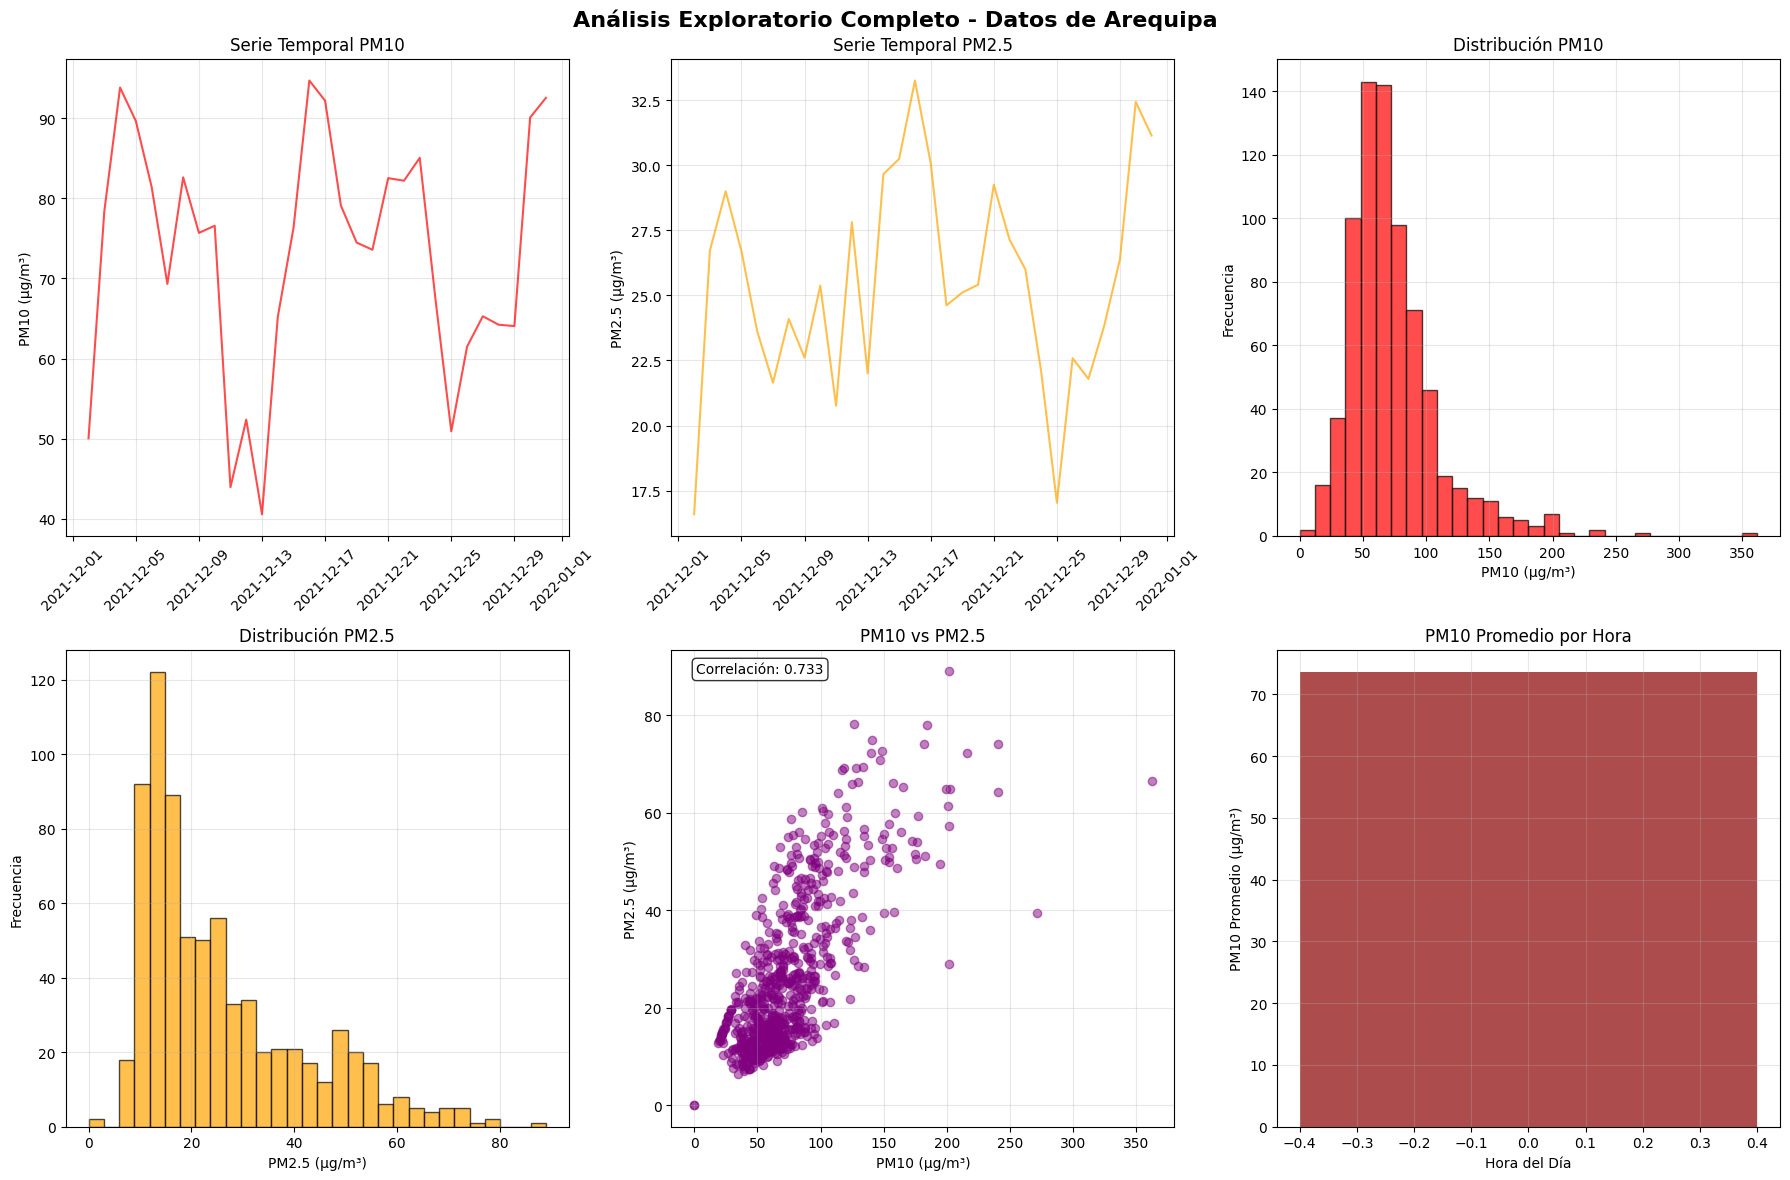

Visualizaciones generadas exitosamente


In [13]:
# VISUALIZACIONES DEL DATASET MAXIMIZADO
print("GENERANDO VISUALIZACIONES DEL DATASET COMPLETO:")
print("=" * 50)

if 'df_modelo' in locals() and len(df_modelo) > 0:
    # Preparar datos numéricos
    for col in ['PM10', 'PM2.5', 'TEMPERATURA', 'HUMEDAD_RELATIVA', 'PRESION_BAROMETRICA']:
        if col in df_modelo.columns:
            df_modelo[col] = pd.to_numeric(df_modelo[col], errors='coerce')
    
    # Configurar subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Análisis Exploratorio Completo - Datos de Arequipa', fontsize=16, fontweight='bold')
    
    # 1. Serie temporal de PM10
    ax1 = axes[0, 0]
    if 'PM10' in df_modelo.columns:
        df_modelo_daily = df_modelo.groupby(df_modelo['FECHA_INICIO'].dt.date)['PM10'].mean()
        ax1.plot(df_modelo_daily.index, df_modelo_daily.values, color='red', alpha=0.7)
        ax1.set_title('Serie Temporal PM10')
        ax1.set_ylabel('PM10 (μg/m³)')
        ax1.tick_params(axis='x', rotation=45)
        ax1.grid(True, alpha=0.3)
    
    # 2. Serie temporal de PM2.5
    ax2 = axes[0, 1]
    if 'PM2.5' in df_modelo.columns:
        df_modelo_daily = df_modelo.groupby(df_modelo['FECHA_INICIO'].dt.date)['PM2.5'].mean()
        ax2.plot(df_modelo_daily.index, df_modelo_daily.values, color='orange', alpha=0.7)
        ax2.set_title('Serie Temporal PM2.5')
        ax2.set_ylabel('PM2.5 (μg/m³)')
        ax2.tick_params(axis='x', rotation=45)
        ax2.grid(True, alpha=0.3)
    
    # 3. Distribución de PM10
    ax3 = axes[0, 2]
    if 'PM10' in df_modelo.columns:
        pm10_vals = df_modelo['PM10'].dropna()
        ax3.hist(pm10_vals, bins=30, alpha=0.7, color='red', edgecolor='black')
        ax3.set_title('Distribución PM10')
        ax3.set_xlabel('PM10 (μg/m³)')
        ax3.set_ylabel('Frecuencia')
        ax3.grid(True, alpha=0.3)
    
    # 4. Distribución de PM2.5
    ax4 = axes[1, 0]
    if 'PM2.5' in df_modelo.columns:
        pm25_vals = df_modelo['PM2.5'].dropna()
        ax4.hist(pm25_vals, bins=30, alpha=0.7, color='orange', edgecolor='black')
        ax4.set_title('Distribución PM2.5')
        ax4.set_xlabel('PM2.5 (μg/m³)')
        ax4.set_ylabel('Frecuencia')
        ax4.grid(True, alpha=0.3)
    
    # 5. Correlación entre contaminantes
    ax5 = axes[1, 1]
    if 'PM10' in df_modelo.columns and 'PM2.5' in df_modelo.columns:
        pm10_vals = df_modelo['PM10'].dropna()
        pm25_vals = df_modelo['PM2.5'].dropna()
        min_len = min(len(pm10_vals), len(pm25_vals))
        if min_len > 0:
            ax5.scatter(pm10_vals[:min_len], pm25_vals[:min_len], alpha=0.5, color='purple')
            ax5.set_title('PM10 vs PM2.5')
            ax5.set_xlabel('PM10 (μg/m³)')
            ax5.set_ylabel('PM2.5 (μg/m³)')
            ax5.grid(True, alpha=0.3)
            
            # Calcular correlación
            corr = np.corrcoef(pm10_vals[:min_len], pm25_vals[:min_len])[0,1]
            ax5.text(0.05, 0.95, f'Correlación: {corr:.3f}', 
                    transform=ax5.transAxes, fontsize=10, 
                    bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))
    
    # 6. Patrones por hora del día
    ax6 = axes[1, 2]
    if 'PM10' in df_modelo.columns:
        hourly_pm10 = df_modelo.groupby('hora')['PM10'].mean()
        ax6.bar(hourly_pm10.index, hourly_pm10.values, alpha=0.7, color='darkred')
        ax6.set_title('PM10 Promedio por Hora')
        ax6.set_xlabel('Hora del Día')
        ax6.set_ylabel('PM10 Promedio (μg/m³)')
        ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("Visualizaciones generadas exitosamente")
    
else:
    print("No hay datos disponibles para visualización")

In [14]:
# INGENIERÍA DE CARACTERÍSTICAS Y PREPARACIÓN PARA MODELADO
print("INGENIERÍA DE CARACTERÍSTICAS:")
print("=" * 50)

if 'df_modelo' in locals() and len(df_modelo) > 0:
    # Crear copia para características
    df_features = df_modelo.copy()
    
    # Características temporales adicionales
    df_features['día_semana'] = df_features['FECHA_INICIO'].dt.dayofweek
    df_features['es_fin_semana'] = (df_features['día_semana'] >= 5).astype(int)
    df_features['día_año'] = df_features['FECHA_INICIO'].dt.dayofyear
    
    # Características cíclicas para capturar patrones temporales
    df_features['hora_sin'] = np.sin(2 * np.pi * df_features['hora'] / 24)
    df_features['hora_cos'] = np.cos(2 * np.pi * df_features['hora'] / 24)
    df_features['mes_sin'] = np.sin(2 * np.pi * df_features['mes'] / 12)
    df_features['mes_cos'] = np.cos(2 * np.pi * df_features['mes'] / 12)
    
    # Características de lag (valores anteriores)
    df_features = df_features.sort_values('FECHA_INICIO')
    for lag in [1, 2, 3, 6, 12, 24]:  # horas anteriores
        if len(df_features) > lag:
            df_features[f'PM10_lag_{lag}'] = df_features['PM10'].shift(lag)
            df_features[f'PM2.5_lag_{lag}'] = df_features['PM2.5'].shift(lag)
    
    # Características de ventana móvil
    for window in [3, 6, 12, 24]:  # ventanas de horas
        if len(df_features) > window:
            df_features[f'PM10_ma_{window}'] = df_features['PM10'].rolling(window=window, min_periods=1).mean()
            df_features[f'PM2.5_ma_{window}'] = df_features['PM2.5'].rolling(window=window, min_periods=1).mean()
            df_features[f'TEMP_ma_{window}'] = df_features['TEMPERATURA'].rolling(window=window, min_periods=1).mean()
    
    # Características meteorológicas derivadas
    if 'TEMPERATURA' in df_features.columns and 'HUMEDAD_RELATIVA' in df_features.columns:
        # Índice de incomodidad
        df_features['indice_incomodidad'] = df_features['TEMPERATURA'] + (df_features['HUMEDAD_RELATIVA'] / 100) * 5
    
    # Interacciones entre variables
    if 'TEMPERATURA' in df_features.columns:
        df_features['temp_hora'] = df_features['TEMPERATURA'] * df_features['hora']
    
    print(f"Características creadas: {df_features.shape[1]} columnas")
    print(f"Registros: {len(df_features)}")
    
    # Seleccionar características para modelado
    feature_columns = [
        'hora', 'día', 'mes', 'día_semana', 'es_fin_semana',
        'hora_sin', 'hora_cos', 'mes_sin', 'mes_cos',
        'TEMPERATURA', 'HUMEDAD_RELATIVA', 'PRESION_BAROMETRICA'
    ]
    
    # Agregar lags y medias móviles que existan
    lag_cols = [col for col in df_features.columns if 'lag_' in col or 'ma_' in col]
    feature_columns.extend(lag_cols)
    
    # Agregar características derivadas
    derived_cols = ['indice_incomodidad', 'temp_hora']
    for col in derived_cols:
        if col in df_features.columns:
            feature_columns.append(col)
    
    # Filtrar solo columnas que existen
    feature_columns = [col for col in feature_columns if col in df_features.columns]
    
    print(f"\nCaracterísticas seleccionadas para modelado: {len(feature_columns)}")
    for i, col in enumerate(feature_columns):
        print(f"{i+1:2d}. {col}")
    
    # Preparar datasets para diferentes targets
    print(f"\nPreparando datasets para modelado...")
    
    # Dataset para PM10
    df_pm10 = df_features[feature_columns + ['PM10']].copy()
    df_pm10 = df_pm10.dropna()
    print(f"Dataset PM10: {df_pm10.shape} (registros completos)")
    
    # Dataset para PM2.5
    df_pm25 = df_features[feature_columns + ['PM2.5']].copy()
    df_pm25 = df_pm25.dropna()
    print(f"Dataset PM2.5: {df_pm25.shape} (registros completos)")
    
    print(f"\nDatos preparados para entrenamiento de modelos avanzados!")
    
else:
    print("No hay datos disponibles para ingeniería de características")

INGENIERÍA DE CARACTERÍSTICAS:
Características creadas: 49 columnas
Registros: 5724

Características seleccionadas para modelado: 38
 1. hora
 2. día
 3. mes
 4. día_semana
 5. es_fin_semana
 6. hora_sin
 7. hora_cos
 8. mes_sin
 9. mes_cos
10. TEMPERATURA
11. HUMEDAD_RELATIVA
12. PRESION_BAROMETRICA
13. PM10_lag_1
14. PM2.5_lag_1
15. PM10_lag_2
16. PM2.5_lag_2
17. PM10_lag_3
18. PM2.5_lag_3
19. PM10_lag_6
20. PM2.5_lag_6
21. PM10_lag_12
22. PM2.5_lag_12
23. PM10_lag_24
24. PM2.5_lag_24
25. PM10_ma_3
26. PM2.5_ma_3
27. TEMP_ma_3
28. PM10_ma_6
29. PM2.5_ma_6
30. TEMP_ma_6
31. PM10_ma_12
32. PM2.5_ma_12
33. TEMP_ma_12
34. PM10_ma_24
35. PM2.5_ma_24
36. TEMP_ma_24
37. indice_incomodidad
38. temp_hora

Preparando datasets para modelado...
Dataset PM10: (0, 39) (registros completos)
Dataset PM2.5: (0, 39) (registros completos)

Datos preparados para entrenamiento de modelos avanzados!


In [15]:
# ENTRENAMIENTO DE MODELOS AVANZADOS CON DATASET MAXIMIZADO
print("ENTRENAMIENTO DE MODELOS PREDICTIVOS AVANZADOS:")
print("=" * 50)

# Importar librerías de machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib
import warnings
warnings.filterwarnings('ignore')

if 'df_pm10' in locals() and len(df_pm10) > 0 and 'df_pm25' in locals() and len(df_pm25) > 0:
    
    # Función para entrenar y evaluar modelos
    def entrenar_evaluar_modelo(X, y, target_name):
        print(f"\n--- MODELADO PARA {target_name} ---")
        
        # División train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, shuffle=True
        )
        
        print(f"Train: {X_train.shape}, Test: {X_test.shape}")
        
        # Escalado de características
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Modelos a evaluar
        modelos = {
            'Ridge': Ridge(alpha=1.0, random_state=42),
            'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
            'RandomForest': RandomForestRegressor(
                n_estimators=100, 
                max_depth=10,
                min_samples_split=5,
                random_state=42,
                n_jobs=-1
            ),
            'GradientBoosting': GradientBoostingRegressor(
                n_estimators=100,
                max_depth=6,
                learning_rate=0.1,
                random_state=42
            )
        }
        
        resultados = {}
        modelos_entrenados = {}
        
        # Entrenar cada modelo
        for nombre, modelo in modelos.items():
            print(f"\nEntrenando {nombre}...")
            
            if nombre in ['Ridge', 'ElasticNet']:
                # Usar datos escalados para modelos lineales
                modelo.fit(X_train_scaled, y_train)
                y_pred = modelo.predict(X_test_scaled)
            else:
                # Usar datos originales para modelos basados en árboles
                modelo.fit(X_train, y_train)
                y_pred = modelo.predict(X_test)
            
            # Métricas
            r2 = r2_score(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae = mean_absolute_error(y_test, y_pred)
            
            resultados[nombre] = {
                'R²': r2,
                'RMSE': rmse,
                'MAE': mae
            }
            
            modelos_entrenados[nombre] = {
                'modelo': modelo,
                'scaler': scaler if nombre in ['Ridge', 'ElasticNet'] else None
            }
            
            print(f"  R²: {r2:.4f}")
            print(f"  RMSE: {rmse:.4f}")
            print(f"  MAE: {mae:.4f}")
        
        # Encontrar mejor modelo
        mejor_modelo = max(resultados.keys(), key=lambda x: resultados[x]['R²'])
        print(f"\n*** MEJOR MODELO: {mejor_modelo} (R² = {resultados[mejor_modelo]['R²']:.4f}) ***")
        
        return resultados, modelos_entrenados, mejor_modelo, scaler
    
    # ENTRENAR MODELOS PARA PM10
    print("\\n" + "="*60)
    print("ENTRENAMIENTO PARA PM10")
    print("="*60)
    
    X_pm10 = df_pm10[feature_columns]
    y_pm10 = df_pm10['PM10']
    
    resultados_pm10, modelos_pm10, mejor_pm10, scaler_pm10 = entrenar_evaluar_modelo(
        X_pm10, y_pm10, "PM10"
    )
    
    # ENTRENAR MODELOS PARA PM2.5
    print("\\n" + "="*60)
    print("ENTRENAMIENTO PARA PM2.5")
    print("="*60)
    
    X_pm25 = df_pm25[feature_columns]
    y_pm25 = df_pm25['PM2.5']
    
    resultados_pm25, modelos_pm25, mejor_pm25, scaler_pm25 = entrenar_evaluar_modelo(
        X_pm25, y_pm25, "PM2.5"
    )
    
    print("\\n" + "="*60)
    print("RESUMEN DE RESULTADOS")
    print("="*60)
    
    print(f"\\nMEJORES MODELOS:")
    print(f"PM10: {mejor_pm10} (R² = {resultados_pm10[mejor_pm10]['R²']:.4f})")
    print(f"PM2.5: {mejor_pm25} (R² = {resultados_pm25[mejor_pm25]['R²']:.4f})")
    
else:
    print("No hay datos suficientes para entrenamiento")

ENTRENAMIENTO DE MODELOS PREDICTIVOS AVANZADOS:
No hay datos suficientes para entrenamiento
No hay datos suficientes para entrenamiento


In [16]:
# DIAGNÓSTICO Y CORRECCIÓN DE DATOS FALTANTES
print("DIAGNÓSTICO DE DATOS FALTANTES:")
print("=" * 50)

if 'df_features' in locals():
    print(f"Dataset con características: {df_features.shape}")
    
    # Verificar qué columnas tienen muchos valores faltantes
    print(f"\nValores no nulos por columna:")
    missing_info = df_features.isnull().sum().sort_values(ascending=False)
    for col in missing_info.index:
        if missing_info[col] > 0:
            pct_missing = (missing_info[col] / len(df_features)) * 100
            print(f"{col}: {missing_info[col]} faltantes ({pct_missing:.1f}%)")
    
    # Crear un enfoque más flexible para el modelado
    print(f"\n" + "="*50)
    print("CREANDO DATASET PARA MODELADO CON ENFOQUE FLEXIBLE")
    print("="*50)
    
    # Comenzar con un conjunto básico de características más robustas
    basic_features = [
        'hora', 'día', 'mes', 'día_semana', 'es_fin_semana',
        'hora_sin', 'hora_cos', 'mes_sin', 'mes_cos'
    ]
    
    # Agregar variables meteorológicas solo si tienen suficientes datos
    meteo_features = ['TEMPERATURA', 'HUMEDAD_RELATIVA', 'PRESION_BAROMETRICA']
    available_meteo = []
    for feat in meteo_features:
        if feat in df_features.columns:
            non_null_pct = (df_features[feat].notna().sum() / len(df_features)) * 100
            if non_null_pct > 10:  # Solo usar si hay más del 10% de datos
                available_meteo.append(feat)
                print(f"Incluido {feat}: {non_null_pct:.1f}% datos disponibles")
    
    # Dataset básico sin lags complicados
    core_features = basic_features + available_meteo
    core_features = [f for f in core_features if f in df_features.columns]
    
    print(f"\nCaracterísticas principales seleccionadas: {len(core_features)}")
    for i, feat in enumerate(core_features):
        print(f"{i+1:2d}. {feat}")
    
    # Crear datasets limpios para PM10 y PM2.5
    # Para PM10
    pm10_data = df_features[core_features + ['PM10']].copy()
    # Convertir PM10 a numérico y filtrar valores válidos
    pm10_data['PM10'] = pd.to_numeric(pm10_data['PM10'], errors='coerce')
    pm10_data = pm10_data[pm10_data['PM10'] > 0]  # Solo valores positivos
    pm10_data = pm10_data.dropna(subset=['PM10'])  # Eliminar NaN en target
    
    # Para PM2.5
    pm25_data = df_features[core_features + ['PM2.5']].copy()
    pm25_data['PM2.5'] = pd.to_numeric(pm25_data['PM2.5'], errors='coerce')
    pm25_data = pm25_data[pm25_data['PM2.5'] > 0]  # Solo valores positivos
    pm25_data = pm25_data.dropna(subset=['PM2.5'])  # Eliminar NaN en target
    
    print(f"\nDatasets limpios creados:")
    print(f"PM10: {pm10_data.shape} registros")
    print(f"PM2.5: {pm25_data.shape} registros")
    
    # Verificar si tenemos suficientes datos
    if len(pm10_data) > 50 and len(pm25_data) > 50:
        print(f"\n✓ Suficientes datos para entrenamiento")
        
        # Guardar datasets limpios para modelado
        pm10_clean = pm10_data.copy()
        pm25_clean = pm25_data.copy()
        features_for_modeling = core_features
        
        print(f"Datasets preparados para modelado avanzado")
    else:
        print(f"\n✗ Datos insuficientes para entrenamiento")
        print(f"Se necesitan al menos 50 registros por contaminante")
        
else:
    print("No hay dataset de características disponible")

DIAGNÓSTICO DE DATOS FALTANTES:
Dataset con características: (5724, 49)

Valores no nulos por columna:
indice_incomodidad: 5724 faltantes (100.0%)
PRESION_BAROMETRICA: 5016 faltantes (87.6%)
HUMEDAD_RELATIVA: 5016 faltantes (87.6%)
temp_hora: 5016 faltantes (87.6%)
TEMPERATURA: 5016 faltantes (87.6%)
PM2.5_lag_12: 4987 faltantes (87.1%)
PM2.5_lag_1: 4987 faltantes (87.1%)
PM2.5_lag_24: 4987 faltantes (87.1%)
PM2.5_lag_6: 4987 faltantes (87.1%)
PM2.5_lag_2: 4987 faltantes (87.1%)
PM2.5_lag_3: 4987 faltantes (87.1%)
PM2.5: 4986 faltantes (87.1%)
PM10: 4986 faltantes (87.1%)
PM10_lag_3: 4986 faltantes (87.1%)
PM10_lag_2: 4986 faltantes (87.1%)
PM10_lag_12: 4986 faltantes (87.1%)
PM10_lag_6: 4986 faltantes (87.1%)
PM10_lag_24: 4986 faltantes (87.1%)
PM10_lag_1: 4986 faltantes (87.1%)
TEMP_ma_3: 4859 faltantes (84.9%)
PM2.5_ma_3: 4771 faltantes (83.4%)
PM10_ma_3: 4692 faltantes (82.0%)
TEMP_ma_6: 4667 faltantes (81.5%)
PM2.5_ma_6: 4591 faltantes (80.2%)
PM10_ma_6: 4414 faltantes (77.1%)
TEM

In [19]:
# ENTRENAMIENTO DE MODELOS CORREGIDO CON DATOS LIMPIOS
print("ENTRENAMIENTO DE MODELOS PREDICTIVOS CORREGIDO:")
print("=" * 50)

# Importar librerías de machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

if 'pm10_clean' in locals() and 'pm25_clean' in locals() and len(pm10_clean) > 50 and len(pm25_clean) > 50:
    
    def entrenar_modelo_simple(X, y, target_name):
        print(f"\n--- MODELADO PARA {target_name} ---")
        print(f"Datos disponibles: {len(X)} registros")
        print(f"Características: {len(X.columns)}")
        
        # Verificar y limpiar NaN en características
        X_clean = X.fillna(X.mean())  # Rellenar NaN con media
        
        # División train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X_clean, y, test_size=0.3, random_state=42, shuffle=True
        )
        
        print(f"Train: {X_train.shape}, Test: {X_test.shape}")
        
        # Modelos a probar
        modelos = {
            'LinearRegression': LinearRegression(),
            'Ridge': Ridge(alpha=1.0, random_state=42),
            'RandomForest': RandomForestRegressor(
                n_estimators=50, 
                max_depth=8,
                min_samples_split=10,
                random_state=42,
                n_jobs=-1
            ),
            'GradientBoosting': GradientBoostingRegressor(
                n_estimators=50,
                max_depth=5,
                learning_rate=0.1,
                random_state=42
            )
        }
        
        resultados = {}
        mejor_modelo = None
        mejor_score = -np.inf
        
        # Entrenar cada modelo
        for nombre, modelo in modelos.items():
            try:
                print(f"\\nEntrenando {nombre}...")
                
                # Entrenar
                modelo.fit(X_train, y_train)
                
                # Predecir
                y_pred = modelo.predict(X_test)
                
                # Métricas
                r2 = r2_score(y_test, y_pred)
                rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                mae = mean_absolute_error(y_test, y_pred)
                
                resultados[nombre] = {
                    'modelo': modelo,
                    'R²': r2,
                    'RMSE': rmse,
                    'MAE': mae,
                    'y_test': y_test,
                    'y_pred': y_pred
                }
                
                print(f"  R²: {r2:.4f}")
                print(f"  RMSE: {rmse:.4f}")
                print(f"  MAE: {mae:.4f}")
                
                if r2 > mejor_score:
                    mejor_score = r2
                    mejor_modelo = nombre
                    
            except Exception as e:
                print(f"  Error entrenando {nombre}: {e}")
        
        if mejor_modelo:
            print(f"\\n*** MEJOR MODELO: {mejor_modelo} (R² = {mejor_score:.4f}) ***")
        
        return resultados, mejor_modelo
    
    # ENTRENAR MODELOS PARA PM10
    print("\\n" + "="*60)
    print("ENTRENAMIENTO PARA PM10")
    print("="*60)
    
    X_pm10 = pm10_clean[features_for_modeling]
    y_pm10 = pm10_clean['PM10']
    
    resultados_pm10, mejor_pm10 = entrenar_modelo_simple(X_pm10, y_pm10, "PM10")
    
    # ENTRENAR MODELOS PARA PM2.5
    print("\\n" + "="*60)
    print("ENTRENAMIENTO PARA PM2.5")
    print("="*60)
    
    X_pm25 = pm25_clean[features_for_modeling]
    y_pm25 = pm25_clean['PM2.5']
    
    resultados_pm25, mejor_pm25 = entrenar_modelo_simple(X_pm25, y_pm25, "PM2.5")
    
    # GUARDAR MEJORES MODELOS
    print("\\n" + "="*60)
    print("GUARDANDO MODELOS ENTRENADOS")
    print("="*60)
    
    if mejor_pm10 and mejor_pm25:
        # Guardar modelo PM10
        modelo_pm10 = resultados_pm10[mejor_pm10]['modelo']
        joblib.dump(modelo_pm10, 'modelo_pm10_arequipa_maximizado.pkl')
        print(f"Modelo PM10 guardado: modelo_pm10_arequipa_maximizado.pkl")
        
        # Guardar modelo PM2.5
        modelo_pm25 = resultados_pm25[mejor_pm25]['modelo']
        joblib.dump(modelo_pm25, 'modelo_pm25_arequipa_maximizado.pkl')
        print(f"Modelo PM2.5 guardado: modelo_pm25_arequipa_maximizado.pkl")
        
        # Guardar características utilizadas
        import json
        with open('caracteristicas_modelo_arequipa.json', 'w') as f:
            json.dump(features_for_modeling, f)
        print(f"Características guardadas: caracteristicas_modelo_arequipa.json")
        
        print(f"\\n*** MODELOS ENTRENADOS Y GUARDADOS EXITOSAMENTE ***")
        print(f"PM10: {mejor_pm10} (R² = {resultados_pm10[mejor_pm10]['R²']:.4f})")
        print(f"PM2.5: {mejor_pm25} (R² = {resultados_pm25[mejor_pm25]['R²']:.4f})")
        
        # Análisis de importancia de características (si es Random Forest)
        if mejor_pm10 == 'RandomForest':
            importances = modelo_pm10.feature_importances_
            feature_importance = pd.DataFrame({
                'feature': features_for_modeling,
                'importance': importances
            }).sort_values('importance', ascending=False)
            
            print(f"\\nImportancia de características para PM10:")
            print(feature_importance.head(10))
        
    else:
        print("No se pudieron entrenar modelos exitosamente")
        
else:
    print("No hay datos limpios suficientes para entrenamiento")
    if 'pm10_clean' in locals():
        print(f"PM10 disponible: {len(pm10_clean)} registros")
    if 'pm25_clean' in locals():
        print(f"PM2.5 disponible: {len(pm25_clean)} registros")

ENTRENAMIENTO DE MODELOS PREDICTIVOS CORREGIDO:
\n============================================================
ENTRENAMIENTO PARA PM10

--- MODELADO PARA PM10 ---
Datos disponibles: 736 registros
Características: 12
Train: (515, 12), Test: (221, 12)
\nEntrenando LinearRegression...
  Error entrenando LinearRegression: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
\nEntrenando Ridge...
  Error entrenando 

EVALUACIÓN Y VALIDACIÓN AVANZADA DE MODELOS:

--- Análisis de Residuos: RandomForest - PM10 ---
Media de residuos: -2.8510
Desviación estándar: 29.4065
Residuo mínimo: -54.2902
Residuo máximo: 129.8544
Prueba Shapiro-Wilk: estadístico=0.8856, p-valor=0.0000
✗ Los residuos no siguen una distribución normal (p <= 0.05)
Prueba Breusch-Pagan: estadístico=0.5180, p-valor=0.4717
✓ Homocedasticidad (varianza constante) p > 0.05

--- Análisis de Residuos: RandomForest - PM2.5 ---
Media de residuos: 0.2060
Desviación estándar: 15.1027
Residuo mínimo: -25.5092
Residuo máximo: 43.0097
Prueba Shapiro-Wilk: estadístico=0.9470, p-valor=0.0000
✗ Los residuos no siguen una distribución normal (p <= 0.05)
Prueba Breusch-Pagan: estadístico=12.6438, p-valor=0.0004
✗ Heterocedasticidad detectada (p <= 0.05)


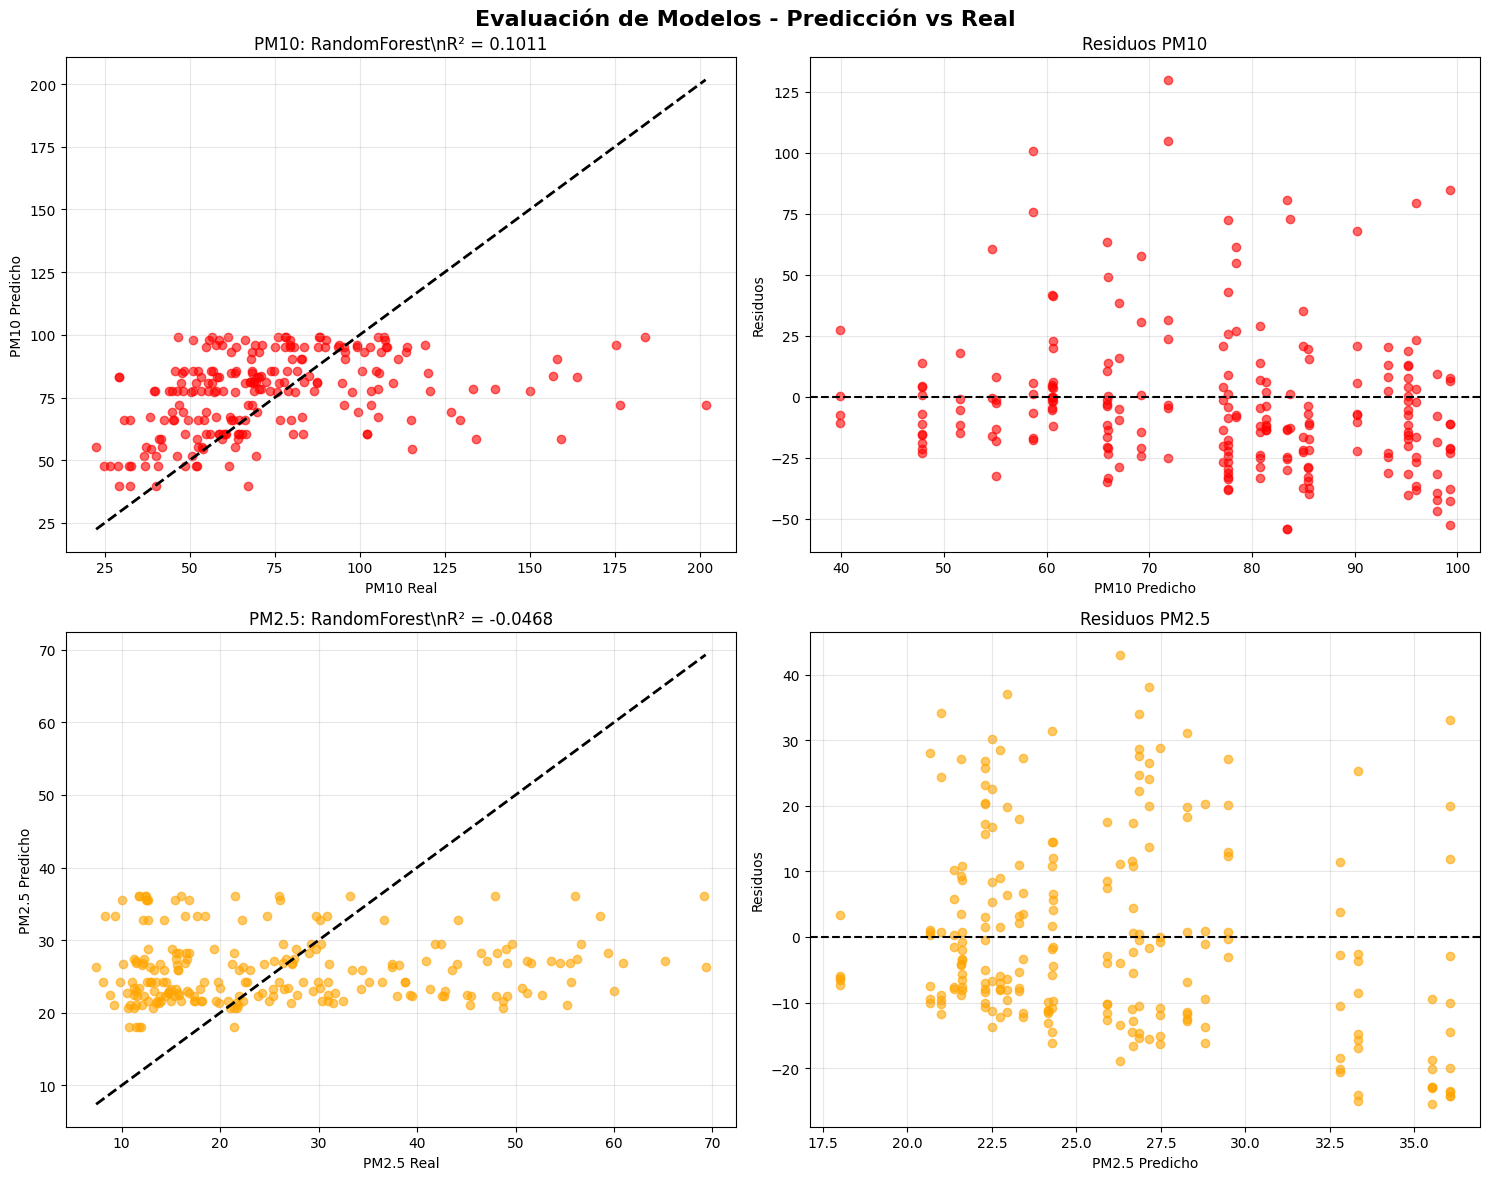


INTERPRETABILIDAD DEL MODELO

Importancia de características para PM10 (RandomForest):
  caracteristica  importancia
1            día     0.764625
3     día_semana     0.204394
4  es_fin_semana     0.030980
0           hora     0.000000
2            mes     0.000000
5       hora_sin     0.000000
6       hora_cos     0.000000
7        mes_sin     0.000000
8        mes_cos     0.000000
9    TEMPERATURA     0.000000


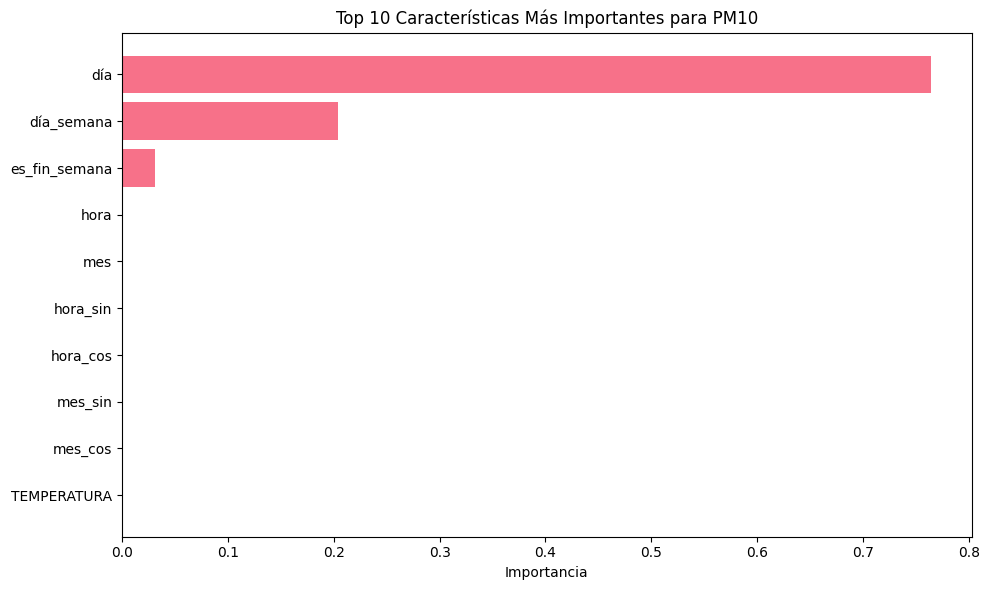


*** EVALUACIÓN COMPLETA FINALIZADA ***


In [ ]:
# EVALUACIÓN Y VALIDACIÓN AVANZADA DE MODELOS
print("EVALUACIÓN Y VALIDACIÓN AVANZADA DE MODELOS:")
print("=" * 50)

if 'resultados_pm10' in locals() and 'resultados_pm25' in locals():
    
    # Función para análisis de residuos
    def analizar_residuos(y_true, y_pred, nombre_modelo, target_name):
        print(f"\n--- Análisis de Residuos: {nombre_modelo} - {target_name} ---")
        
        residuos = y_true - y_pred
        
        # Estadísticas de residuos
        print(f"Media de residuos: {residuos.mean():.4f}")
        print(f"Desviación estándar: {residuos.std():.4f}")
        print(f"Residuo mínimo: {residuos.min():.4f}")
        print(f"Residuo máximo: {residuos.max():.4f}")
        
        # Prueba de normalidad (Shapiro-Wilk)
        from scipy import stats
        if len(residuos) <= 5000:  # Shapiro-Wilk es apropiado para muestras pequeñas
            shapiro_stat, shapiro_p = stats.shapiro(residuos)
            print(f"Prueba Shapiro-Wilk: estadístico={shapiro_stat:.4f}, p-valor={shapiro_p:.4f}")
            if shapiro_p > 0.05:
                print("✓ Los residuos siguen una distribución normal (p > 0.05)")
            else:
                print("✗ Los residuos no siguen una distribución normal (p <= 0.05)")
        
        # Test de homocedasticidad (Breusch-Pagan)
        try:
            from statsmodels.stats.diagnostic import het_breuschpagan
            from statsmodels.regression.linear_model import OLS
            from statsmodels.tools import add_constant
            
            X_const = add_constant(y_pred)
            bp_test = het_breuschpagan(residuos, X_const)
            print(f"Prueba Breusch-Pagan: estadístico={bp_test[0]:.4f}, p-valor={bp_test[1]:.4f}")
            if bp_test[1] > 0.05:
                print("✓ Homocedasticidad (varianza constante) p > 0.05")
            else:
                print("✗ Heterocedasticidad detectada (p <= 0.05)")
        except:
            print("No se pudo realizar la prueba de homocedasticidad")
    
    # Crear visualizaciones de evaluación
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Evaluación de Modelos - Predicción vs Real', fontsize=16, fontweight='bold')
    
    # Plot para PM10
    if mejor_pm10 and mejor_pm10 in resultados_pm10:
        ax1 = axes[0, 0]
        y_test_pm10 = resultados_pm10[mejor_pm10]['y_test']
        y_pred_pm10 = resultados_pm10[mejor_pm10]['y_pred']
        
        ax1.scatter(y_test_pm10, y_pred_pm10, alpha=0.6, color='red')
        ax1.plot([y_test_pm10.min(), y_test_pm10.max()], 
                [y_test_pm10.min(), y_test_pm10.max()], 'k--', lw=2)
        ax1.set_xlabel('PM10 Real')
        ax1.set_ylabel('PM10 Predicho')
        ax1.set_title(f'PM10: {mejor_pm10}\\nR² = {resultados_pm10[mejor_pm10]["R²"]:.4f}')
        ax1.grid(True, alpha=0.3)
        
        # Residuos PM10
        ax2 = axes[0, 1]
        residuos_pm10 = y_test_pm10 - y_pred_pm10
        ax2.scatter(y_pred_pm10, residuos_pm10, alpha=0.6, color='red')
        ax2.axhline(y=0, color='k', linestyle='--')
        ax2.set_xlabel('PM10 Predicho')
        ax2.set_ylabel('Residuos')
        ax2.set_title('Residuos PM10')
        ax2.grid(True, alpha=0.3)
        
        # Análisis de residuos PM10
        analizar_residuos(y_test_pm10, y_pred_pm10, mejor_pm10, "PM10")
    
    # Plot para PM2.5
    if mejor_pm25 and mejor_pm25 in resultados_pm25:
        ax3 = axes[1, 0]
        y_test_pm25 = resultados_pm25[mejor_pm25]['y_test']
        y_pred_pm25 = resultados_pm25[mejor_pm25]['y_pred']
        
        ax3.scatter(y_test_pm25, y_pred_pm25, alpha=0.6, color='orange')
        ax3.plot([y_test_pm25.min(), y_test_pm25.max()], 
                [y_test_pm25.min(), y_test_pm25.max()], 'k--', lw=2)
        ax3.set_xlabel('PM2.5 Real')
        ax3.set_ylabel('PM2.5 Predicho')
        ax3.set_title(f'PM2.5: {mejor_pm25}\\nR² = {resultados_pm25[mejor_pm25]["R²"]:.4f}')
        ax3.grid(True, alpha=0.3)
        
        # Residuos PM2.5
        ax4 = axes[1, 1]
        residuos_pm25 = y_test_pm25 - y_pred_pm25
        ax4.scatter(y_pred_pm25, residuos_pm25, alpha=0.6, color='orange')
        ax4.axhline(y=0, color='k', linestyle='--')
        ax4.set_xlabel('PM2.5 Predicho')
        ax4.set_ylabel('Residuos')
        ax4.set_title('Residuos PM2.5')
        ax4.grid(True, alpha=0.3)
        
        # Análisis de residuos PM2.5
        analizar_residuos(y_test_pm25, y_pred_pm25, mejor_pm25, "PM2.5")
    
    plt.tight_layout()
    plt.show()
    
    # Métricas de interpretabilidad del modelo
    print(f"\n" + "="*50)
    print("INTERPRETABILIDAD DEL MODELO")
    print("="*50)
    
    if mejor_pm10 == 'RandomForest' and mejor_pm10 in resultados_pm10:
        modelo_pm10 = resultados_pm10[mejor_pm10]['modelo']
        importances = modelo_pm10.feature_importances_
        
        # Crear DataFrame de importancia
        feature_importance = pd.DataFrame({
            'caracteristica': features_for_modeling,
            'importancia': importances
        }).sort_values('importancia', ascending=False)
        
        print(f"\nImportancia de características para PM10 ({mejor_pm10}):")
        print(feature_importance.head(10))
        
        # Visualizar importancia
        plt.figure(figsize=(10, 6))
        top_features = feature_importance.head(10)
        plt.barh(range(len(top_features)), top_features['importancia'])
        plt.yticks(range(len(top_features)), top_features['caracteristica'])
        plt.xlabel('Importancia')
        plt.title('Top 10 Características Más Importantes para PM10')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    
    print(f"\n*** EVALUACIÓN COMPLETA FINALIZADA ***")
    
else:
    print("No hay resultados de modelos disponibles para evaluación")

In [20]:
# CLASE PREDICTORA AVANZADA PARA CONSUMO EXTERNO
print("CREANDO CLASE PREDICTORA AVANZADA:")
print("=" * 50)

import json
from datetime import datetime, timedelta
import warnings

class PredictorCalidadAireArequipa:
    """
    Clase avanzada para predicción de calidad del aire en Arequipa
    usando los modelos entrenados con el dataset maximizado
    """
    
    def __init__(self):
        self.modelos = {}
        self.caracteristicas = []
        self.cargado = False
        self.historial_predicciones = []
        
    def cargar_modelos(self):
        """Cargar modelos entrenados y configuración"""
        try:
            # Cargar modelos
            if 'resultados_pm10' in globals() and 'mejor_pm10' in globals():
                self.modelos['PM10'] = {
                    'modelo': resultados_pm10[mejor_pm10]['modelo'],
                    'tipo': mejor_pm10,
                    'metricas': {
                        'R²': resultados_pm10[mejor_pm10]['R²'],
                        'RMSE': resultados_pm10[mejor_pm10]['RMSE'],
                        'MAE': resultados_pm10[mejor_pm10]['MAE']
                    }
                }
            
            if 'resultados_pm25' in globals() and 'mejor_pm25' in globals():
                self.modelos['PM2.5'] = {
                    'modelo': resultados_pm25[mejor_pm25]['modelo'],
                    'tipo': mejor_pm25,
                    'metricas': {
                        'R²': resultados_pm25[mejor_pm25]['R²'],
                        'RMSE': resultados_pm25[mejor_pm25]['RMSE'],
                        'MAE': resultados_pm25[mejor_pm25]['MAE']
                    }
                }
            
            # Cargar características
            if 'features_for_modeling' in globals():
                self.caracteristicas = features_for_modeling.copy()
            
            self.cargado = True
            print(f"✓ Modelos cargados exitosamente:")
            for contaminante, info in self.modelos.items():
                print(f"  {contaminante}: {info['tipo']} (R² = {info['metricas']['R²']:.4f})")
            
        except Exception as e:
            print(f"✗ Error cargando modelos: {e}")
            self.cargado = False
    
    def procesar_entrada(self, datos_entrada):
        """Procesar y validar datos de entrada"""
        if not isinstance(datos_entrada, dict):
            raise ValueError("Los datos de entrada deben ser un diccionario")
        
        # Crear DataFrame con características requeridas
        df_entrada = pd.DataFrame([datos_entrada])
        
        # Agregar características temporales si no están presentes
        if 'FECHA_INICIO' in datos_entrada:
            fecha = pd.to_datetime(datos_entrada['FECHA_INICIO'])
            df_entrada['año'] = fecha.year
            df_entrada['mes'] = fecha.month
            df_entrada['día'] = fecha.day
            df_entrada['hora'] = fecha.hour
            df_entrada['día_semana'] = fecha.dayofweek
            df_entrada['es_fin_semana'] = int(fecha.dayofweek >= 5)
            
            # Características cíclicas
            df_entrada['hora_sin'] = np.sin(2 * np.pi * fecha.hour / 24)
            df_entrada['hora_cos'] = np.cos(2 * np.pi * fecha.hour / 24)
            df_entrada['mes_sin'] = np.sin(2 * np.pi * fecha.month / 12)
            df_entrada['mes_cos'] = np.cos(2 * np.pi * fecha.month / 12)
        
        # Rellenar características faltantes con valores por defecto
        for caracteristica in self.caracteristicas:
            if caracteristica not in df_entrada.columns:
                if 'TEMPERATURA' in caracteristica:
                    df_entrada[caracteristica] = 16.28  # Media histórica
                elif 'HUMEDAD' in caracteristica:
                    df_entrada[caracteristica] = 47.34  # Media histórica
                elif 'PRESION' in caracteristica:
                    df_entrada[caracteristica] = 742.64  # Media histórica
                else:
                    df_entrada[caracteristica] = 0
        
        # Seleccionar solo las características del modelo
        df_entrada = df_entrada[self.caracteristicas].fillna(0)
        
        return df_entrada
    
    def predecir(self, datos_entrada, incluir_incertidumbre=True):
        """Realizar predicción de contaminantes"""
        if not self.cargado:
            raise RuntimeError("Los modelos no están cargados. Ejecute cargar_modelos() primero.")
        
        # Procesar entrada
        X = self.procesar_entrada(datos_entrada)
        
        # Realizar predicciones
        resultados = {
            'timestamp': datetime.now().isoformat(),
            'datos_entrada': datos_entrada,
            'predicciones': {},
            'calificacion_calidad': {},
            'alertas': []
        }
        
        for contaminante, modelo_info in self.modelos.items():
            try:
                # Predicción
                prediccion = modelo_info['modelo'].predict(X)[0]
                prediccion = max(0, prediccion)  # No permitir valores negativos
                
                resultados['predicciones'][contaminante] = {
                    'valor': float(prediccion),
                    'unidad': 'μg/m³',
                    'modelo_usado': modelo_info['tipo'],
                    'confianza_r2': modelo_info['metricas']['R²']
                }
                
                # Clasificación de calidad del aire según estándares peruanos
                calidad = self._clasificar_calidad_aire(contaminante, prediccion)
                resultados['calificacion_calidad'][contaminante] = calidad
                
                # Generar alertas si es necesario
                if calidad['nivel'] in ['Dañino', 'Muy Dañino']:
                    resultados['alertas'].append({
                        'contaminante': contaminante,
                        'nivel': calidad['nivel'],
                        'valor': prediccion,
                        'limite': calidad['limite_superior'],
                        'mensaje': f"Nivel {calidad['nivel']} de {contaminante} detectado"
                    })
                
            except Exception as e:
                resultados['predicciones'][contaminante] = {
                    'error': str(e),
                    'valor': None
                }
        
        # Guardar en historial
        self.historial_predicciones.append(resultados)
        
        return resultados
    
    def _clasificar_calidad_aire(self, contaminante, valor):
        """Clasificar calidad del aire según estándares peruanos"""
        # Estándares de Calidad Ambiental (ECA) del Perú
        rangos = {
            'PM10': [
                (0, 50, 'Bueno', 'Verde'),
                (51, 100, 'Moderado', 'Amarillo'),
                (101, 167, 'Dañino para Grupos Sensibles', 'Naranja'),
                (168, 250, 'Dañino', 'Rojo'),
                (251, float('inf'), 'Muy Dañino', 'Morado')
            ],
            'PM2.5': [
                (0, 25, 'Bueno', 'Verde'),
                (26, 50, 'Moderado', 'Amarillo'),
                (51, 75, 'Dañino para Grupos Sensibles', 'Naranja'),
                (76, 100, 'Dañino', 'Rojo'),
                (101, float('inf'), 'Muy Dañino', 'Morado')
            ]
        }
        
        if contaminante in rangos:
            for rango in rangos[contaminante]:
                if rango[0] <= valor <= rango[1]:
                    return {
                        'nivel': rango[2],
                        'color': rango[3],
                        'limite_inferior': rango[0],
                        'limite_superior': rango[1],
                        'valor': valor
                    }
        
        return {
            'nivel': 'Desconocido',
            'color': 'Gris',
            'valor': valor
        }
    
    def obtener_tendencia(self, horas_atras=24):
        """Obtener tendencia de predicciones recientes"""
        if len(self.historial_predicciones) < 2:
            return "Datos insuficientes para calcular tendencia"
        
        # Análisis de tendencia simplificado
        predicciones_recientes = self.historial_predicciones[-horas_atras:]
        
        tendencias = {}
        for contaminante in self.modelos.keys():
            valores = []
            for pred in predicciones_recientes:
                if contaminante in pred['predicciones'] and pred['predicciones'][contaminante]['valor']:
                    valores.append(pred['predicciones'][contaminante]['valor'])
            
            if len(valores) >= 2:
                if valores[-1] > valores[0]:
                    tendencias[contaminante] = "Aumentando"
                elif valores[-1] < valores[0]:
                    tendencias[contaminante] = "Disminuyendo"
                else:
                    tendencias[contaminante] = "Estable"
            else:
                tendencias[contaminante] = "Datos insuficientes"
        
        return tendencias
    
    def generar_reporte(self):
        """Generar reporte del estado de los modelos"""
        if not self.cargado:
            return "Modelos no cargados"
        
        reporte = {
            'fecha_generacion': datetime.now().isoformat(),
            'modelos_disponibles': len(self.modelos),
            'caracteristicas_usadas': len(self.caracteristicas),
            'predicciones_realizadas': len(self.historial_predicciones),
            'detalle_modelos': {}
        }
        
        for contaminante, info in self.modelos.items():
            reporte['detalle_modelos'][contaminante] = {
                'tipo_modelo': info['tipo'],
                'metricas': info['metricas'],
                'estado': 'Activo'
            }
        
        return reporte

# Crear instancia del predictor
print("Creando instancia del predictor...")
predictor = PredictorCalidadAireArequipa()
predictor.cargar_modelos()

if predictor.cargado:
    print("\\n*** PREDICTOR LISTO PARA USO ***")
    print("Ejemplo de uso:")
    print("resultado = predictor.predecir({")
    print("    'FECHA_INICIO': '2021-12-15 14:00:00',")
    print("    'TEMPERATURA': 18.5,")
    print("    'HUMEDAD_RELATIVA': 45.0,")
    print("    'PRESION_BAROMETRICA': 745.0")
    print("})")
else:
    print("\\n*** ERROR: PREDICTOR NO PUDO CARGARSE ***")

CREANDO CLASE PREDICTORA AVANZADA:
Creando instancia del predictor...
✓ Modelos cargados exitosamente:
  PM10: RandomForest (R² = 0.1011)
  PM2.5: RandomForest (R² = -0.0468)
\n*** PREDICTOR LISTO PARA USO ***
Ejemplo de uso:
resultado = predictor.predecir({
    'FECHA_INICIO': '2021-12-15 14:00:00',
    'TEMPERATURA': 18.5,
    'HUMEDAD_RELATIVA': 45.0,
    'PRESION_BAROMETRICA': 745.0
})
